## K Nearest Neighbors

K-Nearest Neighbors (KNN) is one of the most intuitive and straightforward machine learning algorithms. It is a non-parametric, instance-based learning method, meaning it doesn't make assumptions about the underlying data distribution and memorizes the training data instead of learning a specific function. It operates on the simple idea that things that are similar exist in close proximity.

<img src="knn1.png" width="600"/>

KNN is widely used for classification and regression tasks. Its simplicity and effectiveness make it a valuable tool in areas like recommendation systems (finding "customers like you"), image recognition (finding similar images), and anomaly detection.

### Predicting Player Position

In this project, we will apply a KNN model to an NBA player dataset for the year 2023 to predict a player's primary court position based on their statistical profile. This task gets to the heart of basketball analytics: can a player's role—as a Guard, Forward, or Center—be quantitatively identified from their box score stats alone? The modern era of "positionless basketball" has made this question increasingly prevalent in recent years, as players enter more of a "do it all" mindset as opposed to the previously strict roles for each position. 

We see this argument manifest in the "greatest point guard of all time" argument (Stephen Curry or Magic Johnson?). Positionless thinkers advocate for Curry, as by many metrics and impact, he is the greatest player to ever play the point guard position. Traditional positional advocates argue for Magic, who is the greatest passer in history, a trait traditionally associated with point guards. However, entering the modern era of positionless basketball has resulted in less importance placed on point guard passing. We will see if this simple, distance-based algorithm can find the statistical patterns that differentiate the traditional roles on a basketball court.

We will use the following libraries:

1. matplotlib (https://matplotlib.org/)
2. numpy (https://numpy.org/)
3. pandas (https://pandas.pydata.org/)
4. seaborn (https://seaborn.pydata.org/)
5. scikit learn (https://scikit-learn.org/)

Start by importing them, and then loading our dataset:

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context('talk')

df = pd.read_csv('2023_nba_player_stats.csv', encoding='latin1')

Now we want to simplify the positional names, from the five positions (PG, SG, SF, PF, C) down to three (G, F, C).

In [22]:
df.columns = [col.strip().lower() for col in df.columns]
df = df.dropna(subset=['pos', 'pts', 'ast', 'reb']).copy()
pos_map = {'P': 'G', 'S': 'F', 'C': 'C'}
df['position_simple'] = df['pos'].str[0].map(pos_map)
df = df[df['position_simple'].isin(['G', 'F', 'C'])]

# Pre model look at the distribution of our positions
print("\nPositional distribution:")
print(df['position_simple'].value_counts())


Positional distribution:
position_simple
F    173
G    151
C     78
Name: count, dtype: int64


Now we will set our variables.

In [23]:
features = ['age', 'gp', 'pts', 'reb', 'ast', 'stl', 'blk', 'fg%', '3p%', 'ft%']
X = df[features]
y = df['position_simple']
X = X.fillna(0)

Then, standardize the data.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

Training set shape: (321, 10)
Test set shape: (81, 10)


### Finding optimal K

Before moving forward with the model, we will find the most optimal K, which we will do by finding the K with the least error.

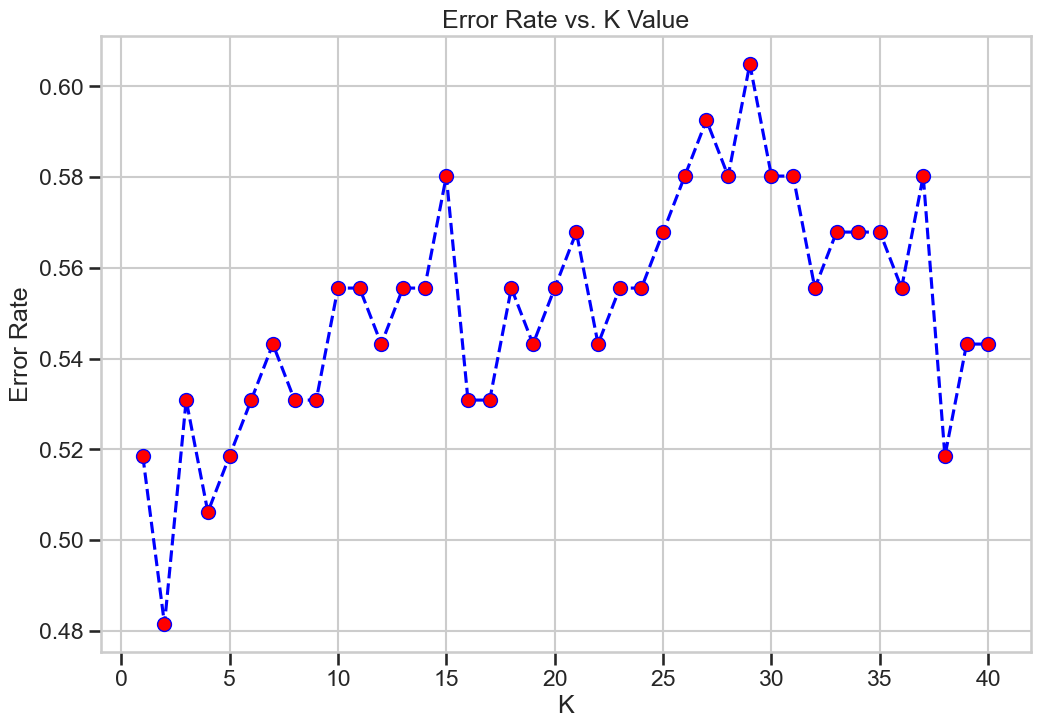


Optimal k value found: 2


In [25]:
error_rate = []

for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 8))
plt.plot(range(1, 41), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

best_k = error_rate.index(min(error_rate)) + 1
print(f"\nOptimal k value found: {best_k}")

## Running the model

Now that we have found the optimal K, it's time to run the model.

In [26]:
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)
y_pred = final_knn.predict(X_test_scaled)

print(f"\nKNN Model Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))


KNN Model Accuracy: 0.5185

Classification Report:
              precision    recall  f1-score   support

           C       0.48      0.62      0.54        16
           F       0.56      0.71      0.62        35
           G       0.47      0.23      0.31        30

    accuracy                           0.52        81
   macro avg       0.50      0.52      0.49        81
weighted avg       0.51      0.52      0.49        81



Looking at these numbers, we can draw some conclusions, the first being that positionless basketball likely has lowered the precision of predictions based on box score statistics. With the rise of "out of position players" (for example Ben Simmons), traditional box score statistics struggle to clearly represent a player's position. However, due to things like height and physical tools that have not changed much with time regarding positions, there is still a clear relationship between box score statistics and a correctly predicted position.

Note that the model was pretty good at identifying the forwards and centers in the dataset correctly (looking at the recall column) but it struggled heavily with guards. 

### Conclusion

We can attribute this to the fact that guards have a lot of different "archetypes" of player. There are the pass-first guards, score-first guards, a combination of the two, and even guards who rebound exceptionally well, all of which were never the case even 10 years ago. The model seems to be misclassifying guards as forwards, which makes sense as the number of scoring guards has spiked overall.

Overall, the KNN algorithm has given us a good picture on how the NBA landscape has changed regarding positions. The conclusions it gives fall pretty well in line with general consensus among basketball analysts and coaches. It would be nice seeing what the results look like 10 years from now, whether we continue to go down the positionless path or whether traditional positions make a comeback.